Python library for modeling and analyzing optical circuits with optical device. The library is based on OOP, optical device lib allows you to build a circuit with CRL lenses for X-ray radiation.

Тестовая реализация кода с помощью opticaldevicelib

In [11]:
import opticaldevicelib as od
import numpy as np
import matplotlib.pyplot as plt
od.Optical_device.set_value(new_dx=5e-9, new_N=2**15)

In [12]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>

Способ инициализации точечного источника c энергией En и распр. ВФ на расстоянии z от него

In [13]:
p = od.Point_source(z=100, En=10) 
E_arr = p.E()

Пример инициализации пластиковых (C21SO8SiH36) линз (идеальная и неидеальная)

In [5]:
# N1_global = 10
# Copy_flag = False
# arr_len = 2 if Copy_flag else 2*N1_global

# phases = 2*np.pi*np.random.rand(arr_len)
# w_s = (np.random.rand(arr_len)-0.5)*np.pi/180*1
# s_s  = (np.random.rand(arr_len)-0.5)*2e-6*1

# crl = od.CRL(lam=p.lam, arr_start=E_arr,\
#                 R=5e-6, A=24e-6, d=5e-6, N1=N1_global, z=0,\
#                     molecula="C21SO8SiH36", density=1.12, Flen=0, gap=0)

# crlm = od.CRLm(lam=p.lam, arr_start=E_arr,\
#                     R=5e-6, A=24e-6, d=5e-6, N1=N1_global, z=0,\
#                         molecula="C21SO8SiH36", density=1.12, Flen=0, gap=0,\
#                             b=1e-6, m=3e6, copy=Copy_flag, arr_phase=phases, arr_s=s_s, arr_w=w_s)
                                

Пример инициализации кремниевых (Si) линз (идеальная и неидеальная)

In [14]:
N1_global = 100
Copy_flag = True
arr_len = 2 if Copy_flag else 2*N1_global

phases = 2*np.pi*np.random.rand(arr_len)*0
w_s = (np.random.rand(arr_len)-0.5)*np.pi/180*0
s_s  = (np.random.rand(arr_len)-0.5)*2e-6*0

crl = od.CRL(lam=p.lam, arr_start=E_arr,\
                R=6.25e-6, A=50e-6, d=2e-6, N1=N1_global, z=0,\
                    molecula="Si", density=2.33, Flen=0, gap=0)

crlm = od.CRLm(lam=p.lam, arr_start=E_arr,\
                    R=6.25e-6, A=50e-6, d=2e-6, N1=N1_global, z=0,\
                        molecula="Si", density=2.33, Flen=0, gap=0,\
                            b=2e-7, m=3e8, copy=Copy_flag, arr_phase=phases, arr_s=s_s, arr_w=w_s)

!!!Важно!!! Подсчёт и установка фокусного расстояния для линз

In [15]:
focus = crl.focus()
crl.set_z(z=focus)
crlm.set_z(z=focus)

Распределение интенсивности излучения в фокусе

100%|██████████| 99/99 [00:00<00:00, 606.79it/s]


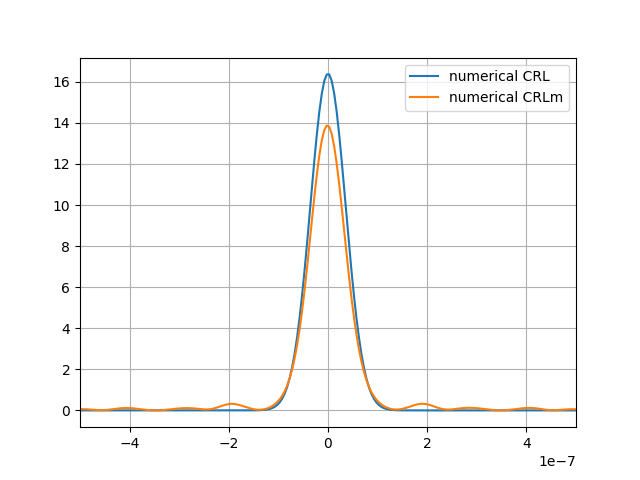

In [16]:
%matplotlib widget
plt.plot(p.x, crl.I(), label="numerical CRL")
plt.plot(p.x, crlm.I(), label="numerical CRLm")
plt.legend()
plt.xlim(-5e-7, 5e-7)
plt.grid()
plt.show()

100%|██████████| 99/99 [00:00<00:00, 677.46it/s]


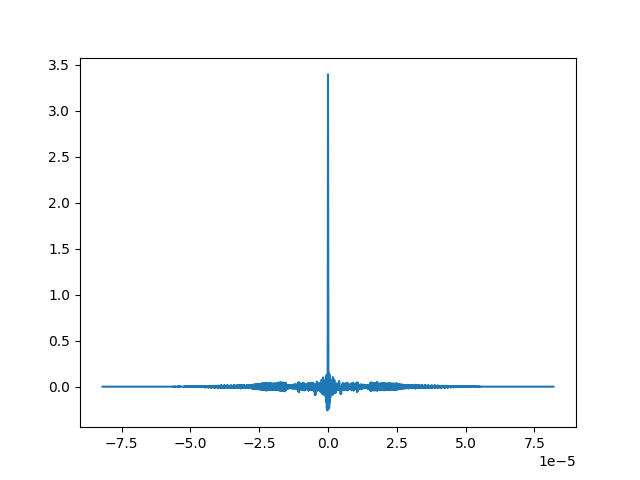

In [17]:
%matplotlib widget
plt.plot(p.x, crlm.E().real)
plt.show()